# **Bankruptcy Project**

Business Objective:

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).



### **EDA**

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the Excel file
excel_file = '/content/bankruptcy-prevention.xlsx'
df = pd.read_excel(excel_file)

# Write the DataFrame to a CSV file
csv_file = 'bankruptcy-prevention.csv'
df.to_csv(csv_file, index=False)

print(f'Excel file {excel_file} has been converted to CSV file {csv_file}')


Excel file /content/bankruptcy-prevention.xlsx has been converted to CSV file bankruptcy-prevention.csv


In [3]:
df.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


In [4]:
bank=pd.read_csv("bankruptcy-prevention.csv",delimiter=";")

In [5]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [6]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
bank.isnull()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [9]:
bank.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

**There zero null values present in Dataset**

In [10]:
bank.duplicated().sum()


147

In [11]:
bank[bank.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [12]:
bank.drop_duplicates(inplace=True)

In [13]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


**Duplicates remove from dataset**

In [14]:
bank.shape

(103, 7)

In [15]:
bank[' class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [16]:
bank[" class"].value_counts()

 class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel=' class'>

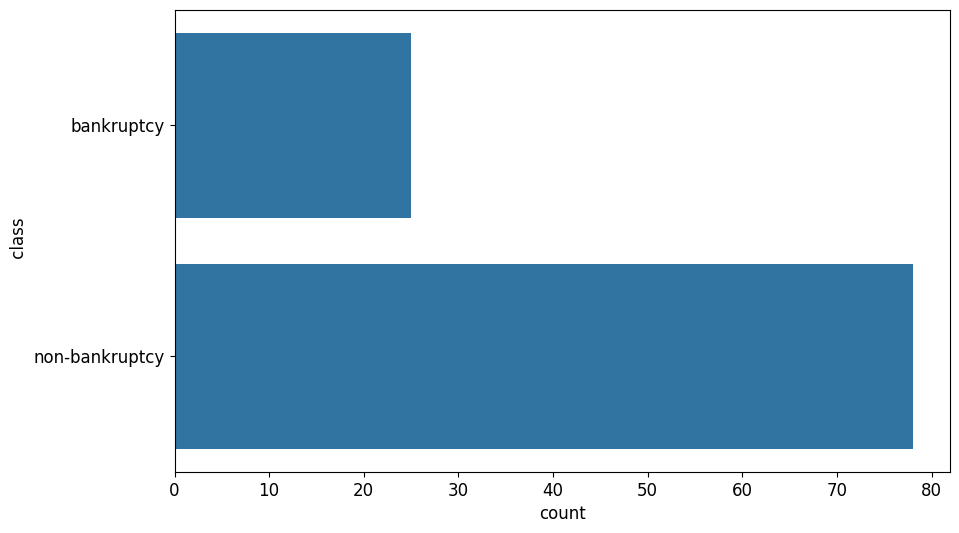

In [17]:
sns.countplot(bank[" class"],x=None)



* From this graph, we can see that there is a significant class imbalance in our dataset, with a much larger number of non-bankruptcy compared to bankruptcy. This imbalance indicates that the minority class (bankruptcy) is underrepresented. This presents a challenge for predictive modeling, as it can lead to a bias towards the majority class and potentially reduce the accuracy of predictions for the minority class.



array([[<Axes: title={'center': 'industrial_risk'}>,
        <Axes: title={'center': ' management_risk'}>],
       [<Axes: title={'center': ' financial_flexibility'}>,
        <Axes: title={'center': ' credibility'}>],
       [<Axes: title={'center': ' competitiveness'}>,
        <Axes: title={'center': ' operating_risk'}>]], dtype=object)

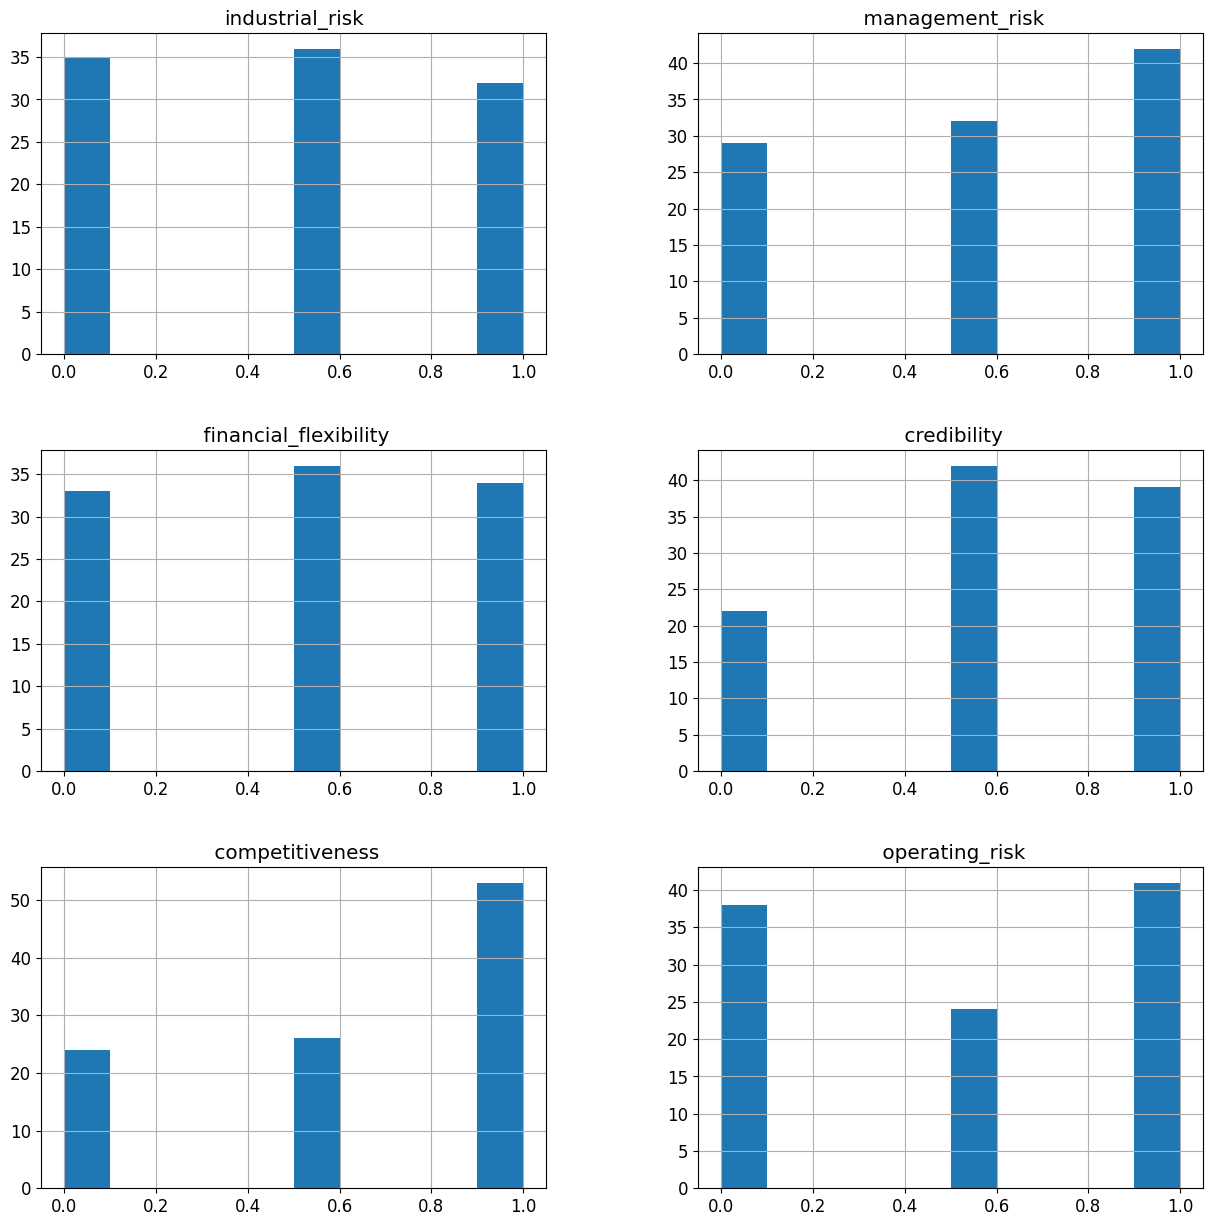

In [18]:
bank.hist(figsize=(15,15))

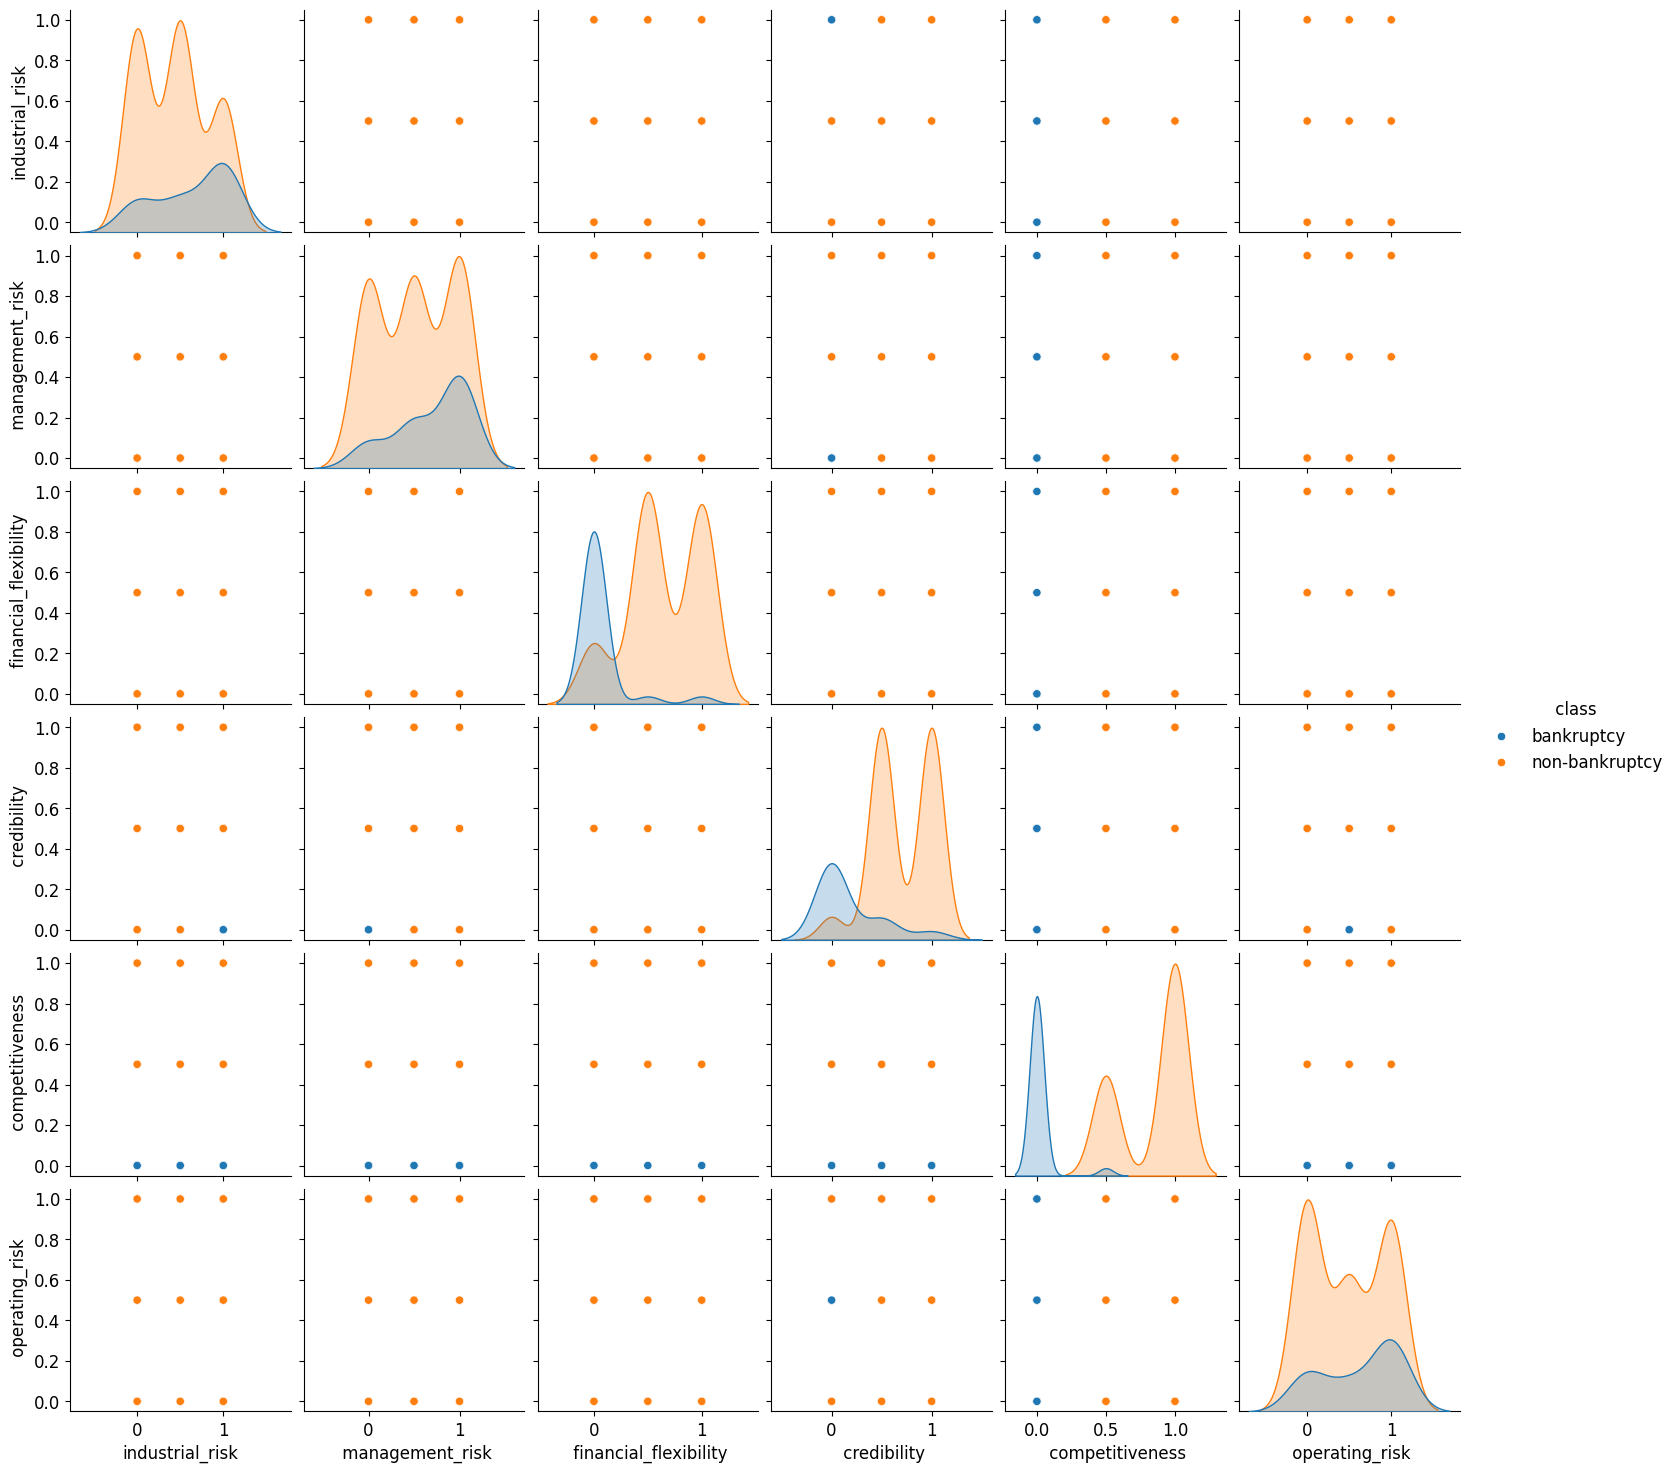

In [19]:
#Pairplot to understand relationships between variables within a dataset
sns.pairplot(bank, hue = ' class')

<Axes: >

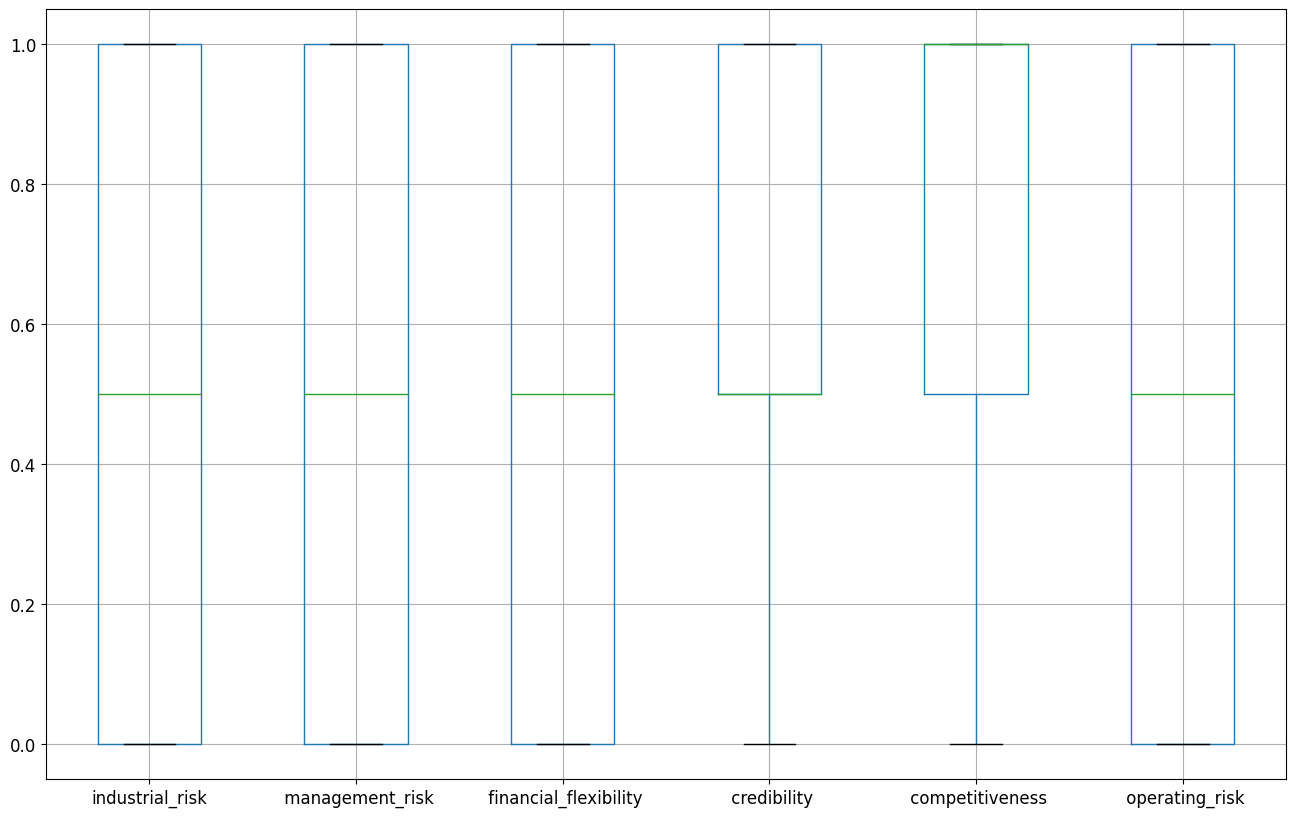

In [20]:
plt.figure(figsize=(16,10))

bank.boxplot()

**Outlier not present in dataset**

### Encode the target variable

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank[' class'] = le.fit_transform(bank[' class'])

In [22]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [23]:
bank.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


<Axes: >

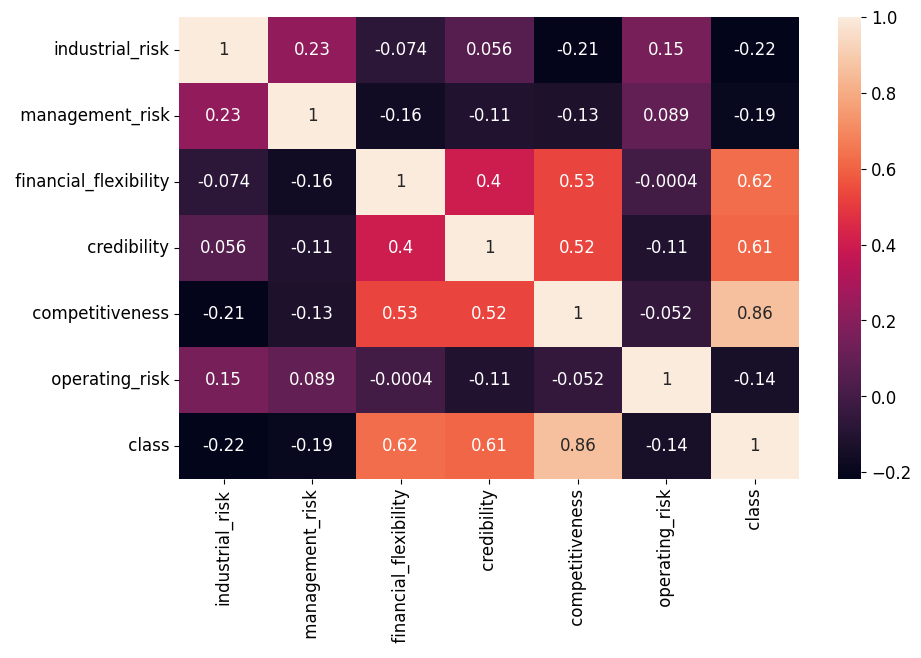

In [24]:
sns.heatmap(bank.corr(),annot=True)

## **Split the Dataset into train and test**

In [25]:
X=bank.drop(" class",axis=1)
y=bank[" class"]

In [26]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5
187,0.0,0.5,0.5,0.5,1.0,0.5
190,0.0,0.5,0.5,0.0,1.0,0.0
192,0.5,1.0,0.0,0.0,1.0,0.0


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
185    1
187    1
190    1
192    1
194    1
Name:  class, Length: 103, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
136,1.0,0.0,1.0,1.0,1.0,1.0
36,1.0,1.0,0.0,1.0,0.0,0.0
151,1.0,1.0,1.0,0.5,1.0,0.0
127,0.5,0.5,1.0,0.5,0.5,0.5
185,0.0,0.5,0.0,0.5,1.0,0.5
...,...,...,...,...,...,...
154,0.5,0.0,1.0,1.0,1.0,1.0
19,0.0,0.5,0.0,0.0,0.0,0.5
179,0.0,0.5,1.0,0.5,1.0,0.0
134,0.0,1.0,0.5,0.5,0.5,1.0


In [30]:
y_train

136    1
36     0
151    1
127    1
185    1
      ..
154    1
19     0
179    1
134    1
194    1
Name:  class, Length: 82, dtype: int64

In [31]:
X_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
112,0.5,0.5,1.0,1.0,1.0,0.5
150,0.5,0.0,1.0,0.5,1.0,1.0
145,0.5,0.0,1.0,0.5,0.5,0.5
130,0.5,0.5,1.0,1.0,0.5,0.5
125,1.0,1.0,1.0,0.5,1.0,1.0
123,1.0,1.0,0.5,0.5,1.0,1.0
175,0.0,0.0,1.0,0.5,1.0,1.0
128,0.5,0.5,0.5,1.0,0.5,0.5
10,1.0,1.0,0.5,0.0,0.0,1.0
0,0.5,1.0,0.0,0.0,0.0,0.5


In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
185    1
187    1
190    1
192    1
194    1
Name:  class, Length: 103, dtype: int64

## **Model Building**

**Top-ranked machine learning algorithms for Classification are:**

1.Logistic Regression

2.Decision Tree

3.Random Forest

4.Support Vector Machine (SVM)

5.Naive Bayes

6.K-Nearest Neighbors (KNN)




## **LogisticRegression Model**

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [37]:
Accuracy=accuracy_score(y_test,y_pred)

In [38]:
print('Logistic Regression Model Accuracy is ', Accuracy)

Logistic Regression Model Accuracy is  0.9523809523809523


### **Accuracy of LogisticRegression model is 95%**

In [39]:
confusion_matrix(y_test,y_pred)


array([[ 4,  1],
       [ 0, 16]])

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
roc_curve(y_test,y_pred)

(array([0. , 0.2, 1. ]), array([0., 1., 1.]), array([2, 1, 0]))

In [43]:
log_test_roc=roc_auc_score(y_test,y_pred)
log_test_roc

0.9

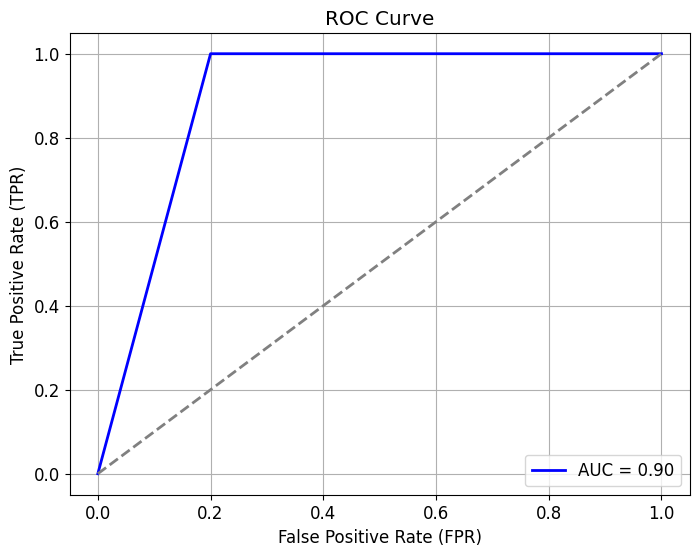

In [44]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {log_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**Decision Tree Model**

In [45]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
dt_pred=dt.predict(X_test)

In [47]:
dt_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [48]:
print('Decision Tree Model Accuracy is ', accuracy_score(y_test,dt_pred))

Decision Tree Model Accuracy is  0.9523809523809523


### **Accuracy of Decision Tree model is 95%**

In [49]:
# Classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



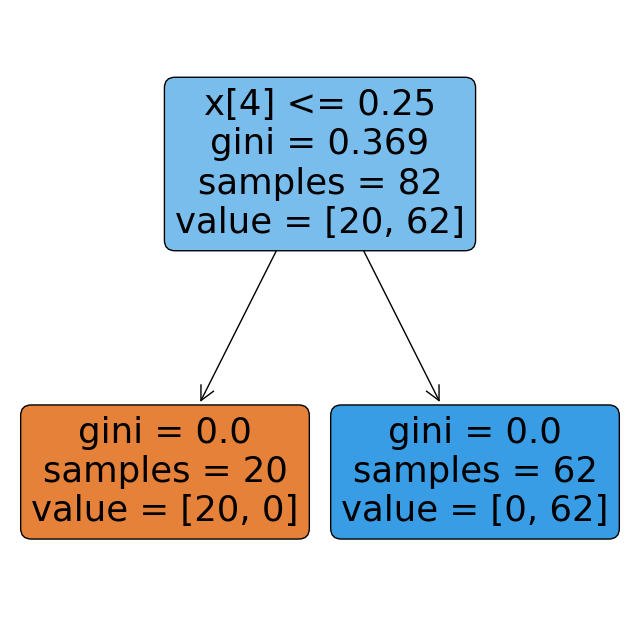

In [50]:
plt.figure(figsize=(8,8))
plot_tree(dt,filled=True,rounded=True);

In [51]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

grid_search= GridSearchCV(dt,params,verbose=2)

In [52]:
grid_search

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [53]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [54]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [55]:
final_dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=1)
final_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [56]:
# Get the best model
best_model = grid_search.best_estimator_

In [57]:
y_pred=final_dt.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9523809523809523

**Accuracy after hyperparameter tunning is 95%**

## **Random Forest Model**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [60]:
rf_pred=rf.predict(X_test)

In [61]:
rf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [62]:
print('Random Forest Model Accuracy is ', accuracy_score(y_test,rf_pred))

Random Forest Model Accuracy is  0.9523809523809523


In [63]:
#Classification report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



### **Random forest model accuracy is 95%**

## **Support Vector Machine**

In [64]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [65]:
svc_pred=svc.predict(X_test)

In [66]:
accuracy_score(y_test,svc_pred)

0.9523809523809523

In [67]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [68]:
#Hyperparameter Tunning
params={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf','poly','sigmoid']}

grid = GridSearchCV(SVC(),param_grid=params,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [69]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [70]:
final_svc=SVC(C=10,gamma=1,kernel='rbf')
final_svc.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [71]:
final_svc_pred=final_svc.predict(X_test)

In [72]:
print('Support Vector Machine Model Accuracy is ', accuracy_score(y_test,final_svc_pred))

Support Vector Machine Model Accuracy is  0.9523809523809523


In [73]:
#Classfication Report
print(classification_report(y_test,final_svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



### **After Hyperparameter Tunning SVC model accuracy is 95%**

## **KNN**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
knn_pred=knn.predict(X_test)

In [76]:
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [77]:
accuracy_score(y_test,knn_pred)

1.0

In [78]:
#classification report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [79]:
#hyperparameter tunning
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}


In [80]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid=params,verbose=1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [81]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

In [82]:
final_knn=KNeighborsClassifier(algorithm='auto',n_neighbors=2,weights='distance')
final_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [83]:
k_pred=final_knn.predict(X_test)

In [84]:
k_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [85]:
print('KNN Model Accuracy is ', accuracy_score(y_test,k_pred))

KNN Model Accuracy is  1.0


### **After Hyperparameter Tunning model accuracy is 100%**

## **Naive Bayes Classifier Model**

In [86]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [87]:
nb_pred=nb.predict(X_test)

In [88]:
nb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [89]:
print('Naive Bayes Model Accuracy is ', accuracy_score(y_test,nb_pred))

Naive Bayes Model Accuracy is  0.9523809523809523


In [90]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [91]:
import pickle
pickle.dump(final_svc,open('final_svc.pkl','wb'))

In [92]:
pickle.dump(rf,open('rf.pkl','wb'))